# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = f'{base_url}appid={weather_api_key}&q=farsund&units=imperial'
response = requests.get(query_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 58.0948, 'lon': 6.8047},
 'dt': 1730351723,
 'id': 3157799,
 'main': {'feels_like': 52.03,
          'grnd_level': 1007,
          'humidity': 87,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 52.95,
          'temp_max': 52.95,
          'temp_min': 52.95},
 'name': 'Farsund',
 'sys': {'country': 'NO',
         'id': 2008816,
         'sunrise': 1730357128,
         'sunset': 1730389629,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 264, 'gust': 40.04, 'speed': 24.61}}


In [15]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tura
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | nar'yan-mar
Processing Record 7 of Set 1 | tchintabaraden
Processing Record 8 of Set 1 | happy valley-goose bay
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | lihue
Processing Record 12 of Set 1 | kapa'a
Processing Record 13 of Set 1 | moron
Processing Record 14 of Set 1 | holualoa
Processing Record 15 of Set 1 | vorkuta
Processing Record 16 of Set 1 | crane
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | boli
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | neustadt an der waldnaab
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | waitangi
Processing

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tura,25.5198,90.2201,28.78,56,38,2.03,IN,1730351944
1,longyearbyen,78.2186,15.6401,-7.09,73,75,1.03,SJ,1730351946
2,bilibino,68.0546,166.4372,-14.47,91,100,3.31,RU,1730351947
3,grytviken,-54.2811,-36.5092,0.06,86,31,4.14,GS,1730351948
4,ancud,-41.8697,-73.8203,8.22,95,15,1.76,CL,1730351949


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,28.78,56,38,2.03,IN,1730351944
1,longyearbyen,78.2186,15.6401,-7.09,73,75,1.03,SJ,1730351946
2,bilibino,68.0546,166.4372,-14.47,91,100,3.31,RU,1730351947
3,grytviken,-54.2811,-36.5092,0.06,86,31,4.14,GS,1730351948
4,ancud,-41.8697,-73.8203,8.22,95,15,1.76,CL,1730351949


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

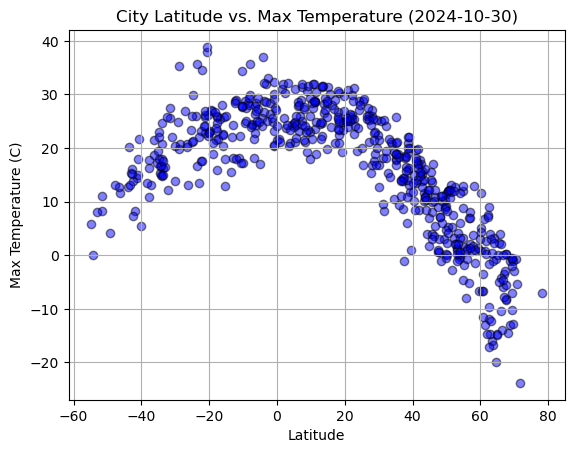

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', edgecolor='black', alpha=.5)

# Incorporate the other graph properties
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature (2024-10-30)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

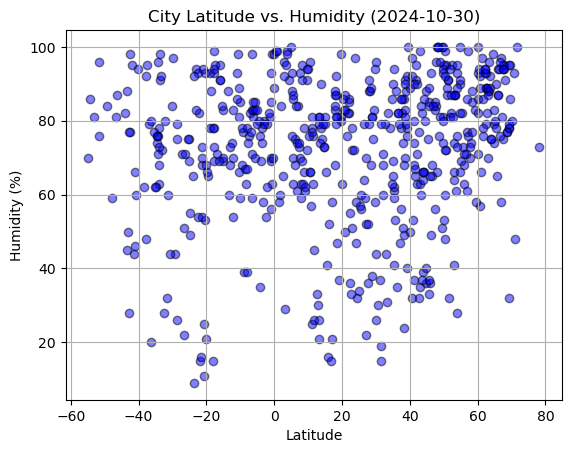

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='blue', edgecolor='black', alpha=.5)

# Incorporate the other graph properties
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity (2024-10-30)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

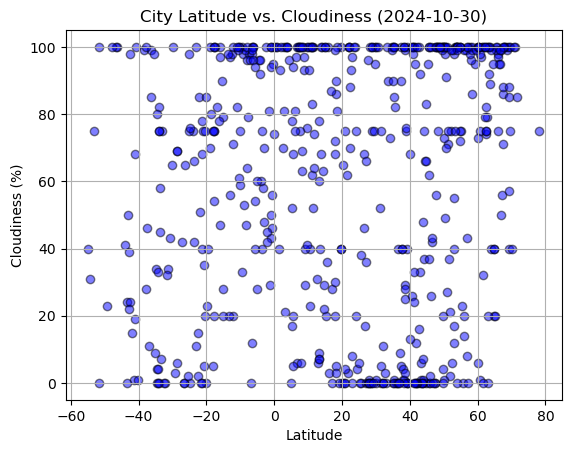

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='blue', edgecolor='black', alpha=.5)

# Incorporate the other graph properties
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Cloudiness (2024-10-30)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

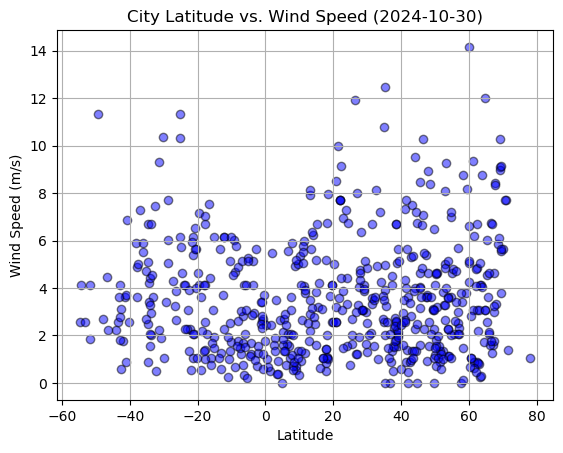

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='blue', edgecolor='black', alpha=.5)

# Incorporate the other graph properties
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Wind Speed (2024-10-30)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
# First lets break down the function into two distinct parts: calculations and formatting
def create_plot(x,y,y_label):
    # Part 1: perform calculations on paramaters
    # Make sure to use numpy.array in case both the x and y values are lists and not an array or series
    x_values = np.array(x)
    y_values = np.array(y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Part 2: perform formatting of the chart
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    # Since every chart will have the xlabel of latitude, I wrote it in the function to remove uneccessary parameters
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    # Same reasoning as above
    plt.title(f'Latitude vs. {y_label}')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,28.78,56,38,2.03,IN,1730351944
1,longyearbyen,78.2186,15.6401,-7.09,73,75,1.03,SJ,1730351946
2,bilibino,68.0546,166.4372,-14.47,91,100,3.31,RU,1730351947
5,nar'yan-mar,67.6713,53.0870,0.18,95,100,8.41,RU,1730351888
6,tchintabaraden,15.8969,5.7985,24.02,16,100,4.21,NE,1730351951


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,0.06,86,31,4.14,GS,1730351948
4,ancud,-41.8697,-73.8203,8.22,95,15,1.76,CL,1730351949
8,port alfred,-33.5906,26.8910,16.21,91,45,2.02,ZA,1730351953
9,bredasdorp,-34.5322,20.0403,15.38,74,4,2.47,ZA,1730351954
12,moron,-34.6534,-58.6198,22.94,76,0,6.71,AR,1730351958


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7843616209909613


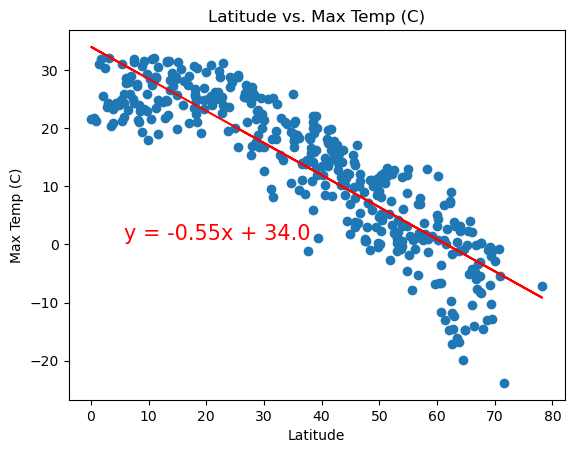

In [30]:
# Linear regression on Northern Hemisphere
create_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Max Temp (C)')

The r-squared is: 0.46913141880270826


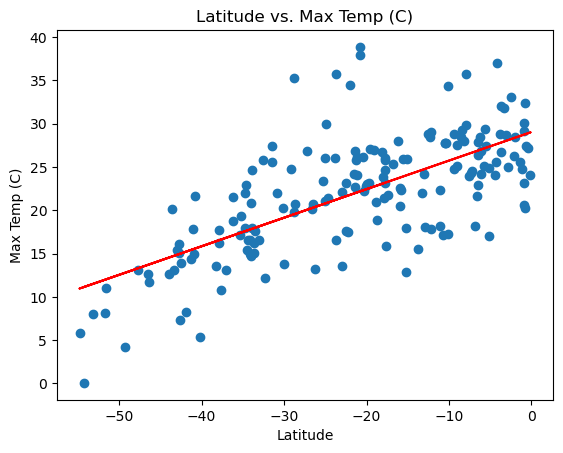

In [32]:
# Linear regression on Southern Hemisphere
create_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Max Temp (C)')

#### **Discussion about the linear relationship:** 
For the northern heishpere, there is a strong negative correlation between max tempuature and the latitude. The temperature drops as the latitude get higher, which means father away from the equator. However, there is only a moderate positive correlation for the southern hemisphere. That means the closer you get to the equator, a latitude of 0, the warmer the max_temp gets. This could be due to how my random cities are distributed accross the southern hemisphere. I could have some values that skew the average of the population. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.03961652108657775


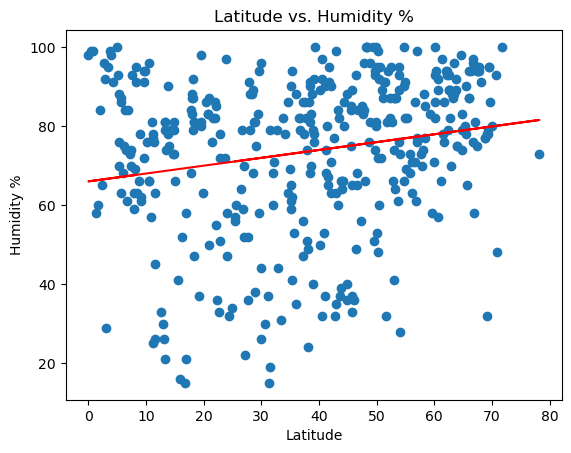

In [34]:
# Northern Hemisphere
create_plot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Humidity %')

The r-squared is: 0.00439120322165829


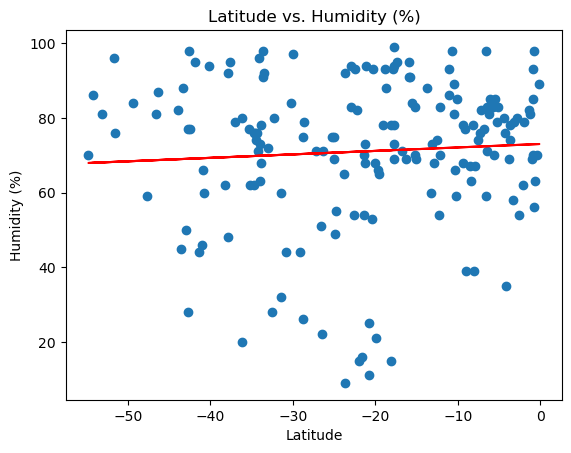

In [37]:
# Southern Hemisphere
create_plot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Humidity (%)')

##### **Discussion about the linear relationship:**
There is no correlation between humidity and latitude in both the northern and southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.012173301201420862


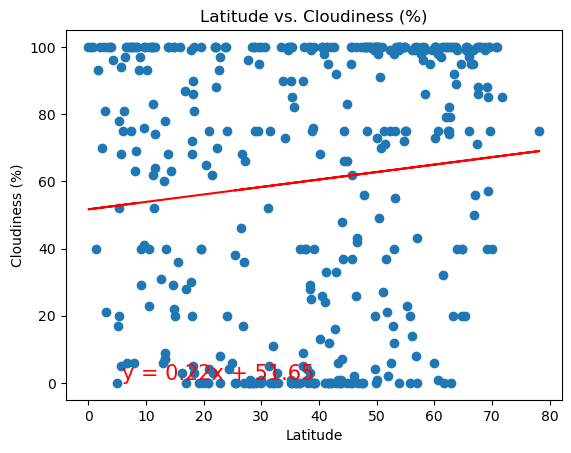

In [36]:
# Northern Hemisphere
create_plot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Cloudiness (%)')

The r-squared is: 0.0897258626410503


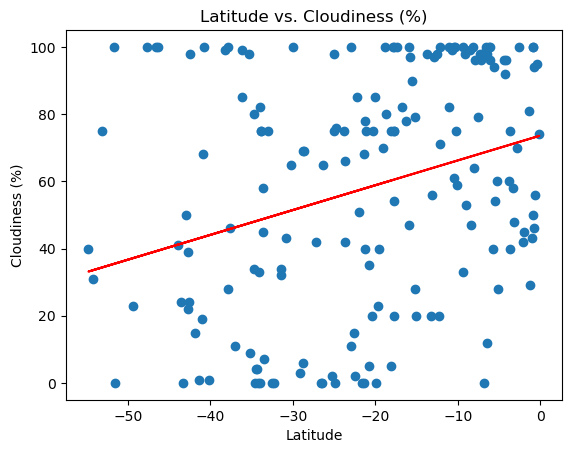

In [38]:
# Southern Hemisphere
create_plot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Cloudiness (%)')

#### **Discussion about the linear relationship:**
There is no correlation between latitude and cloudiness in both the northern and southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


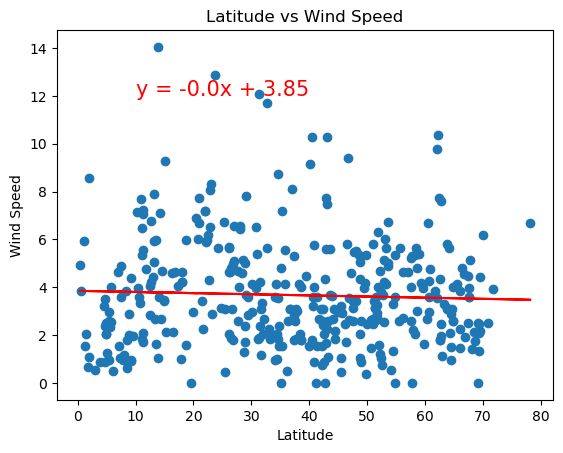

In [21]:
# Northern Hemisphere
create_plot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Wind Speed (m/s)')

The r-squared is: 0.04431144427866595


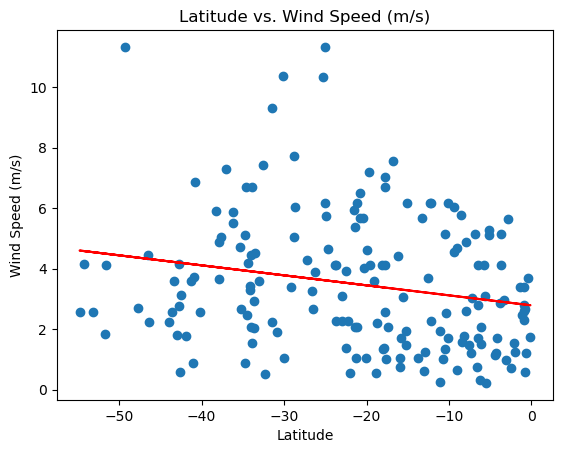

In [39]:
# Southern Hemisphere
create_plot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Wind Speed (m/s)')

#### **Discussion about the linear relationship:**
There is no correlation between wind speed and latitude in both the northern and sourthern hemisphere. 